🌍 Remote Sensing & GIS Essentials with Python
This notebook is a hands-on, modular toolkit designed to equip environmental scientists, hydrologists, engineers, and geospatial learners with foundational and practical skills in remote sensing and geographic information systems (GIS) using open-source Python libraries.

Whether you're calculating vegetation indices like NDVI, visualizing shapefiles, clipping rasters, or performing zonal statistics, this notebook walks you through each step—blending theory with reproducible code.

🧾 How to Use This Notebook
Open the notebook in Jupyter or Google Colab.

Create a new notebook and name it: Remote_Sensing_Toolkit.ipynb

Copy and paste the full code block from the toolkit into the first code cell.

Run each cell one at a time to execute core GIS and remote sensing operations—like raster visualization, NDVI generation, vector overlay, clipping, and zonal summaries. No proprietary software required. All tools—like rasterio, geopandas, folium, and matplotlib—are open-source, beginner-friendly, and widely used in academic and industry workflows.

In [1]:
# 🛰️ Remote Sensing & GIS Essentials with Python
# Developed for Ravi’s hydrological and environmental modeling tools
# Includes: Raster I/O, NDVI, Clipping, Zonal Stats, Folium Mapping

!pip install rasterio geopandas matplotlib folium shapely pyproj rasterstats --quiet

import rasterio
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import folium
import json
from rasterio.mask import mask
from rasterstats import zonal_stats


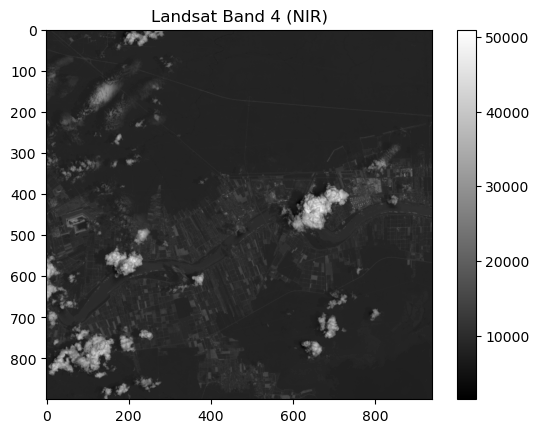

In [15]:
raster_path = 'LAB4.tif'  # NIR band

with rasterio.open(raster_path) as src:
    band = src.read(1)

plt.imshow(band, cmap='gray')
plt.title('Landsat Band 4 (NIR)')
plt.colorbar()
plt.show()


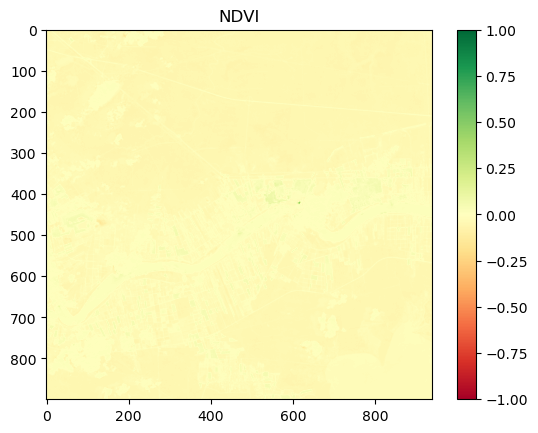

In [19]:
with rasterio.open('LAB4.tif') as nir_src:
    nir = nir_src.read(1).astype('float32')
with rasterio.open('LAB3.tif') as red_src:
    red = red_src.read(1).astype('float32')

ndvi = (nir - red) / (nir + red)

plt.imshow(ndvi, cmap='RdYlGn', vmin=-1, vmax=1)
plt.title('NDVI')
plt.colorbar()
plt.show()


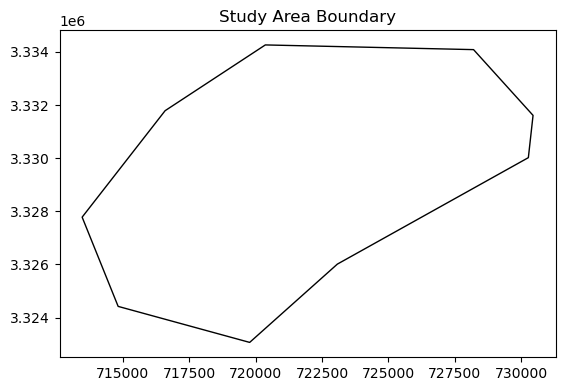

In [20]:
gdf = gpd.read_file('testshape.shp')
gdf.plot(edgecolor='black', facecolor='none')
plt.title('Study Area Boundary')
plt.show()


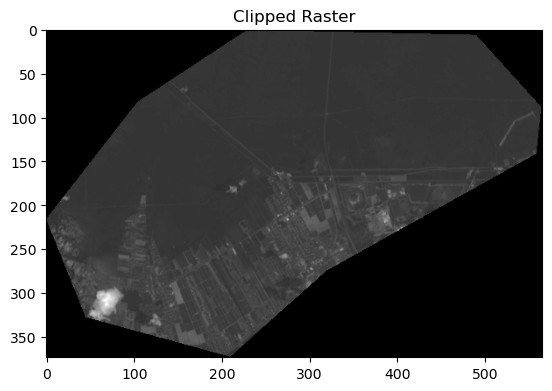

In [21]:
shapes = [json.loads(gdf.to_json())['features'][0]['geometry']]

with rasterio.open('LAB4.tif') as src:
    out_image, out_transform = mask(src, shapes, crop=True)
    clipped_meta = src.meta.copy()
    clipped_meta.update({
        "height": out_image.shape[1],
        "width": out_image.shape[2],
        "transform": out_transform
    })

plt.imshow(out_image[0], cmap='gray')
plt.title('Clipped Raster')
plt.show()


In [29]:
import rasterio
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from rasterstats import zonal_stats

# ---- 1. Export NDVI to a temporary GeoTIFF ----
# Load metadata from a reference raster (e.g. Red or NIR band)
with rasterio.open('LAB4.tif') as src:
    meta = src.meta.copy()
    meta.update(driver='GTiff', dtype=rasterio.float32, count=1)

    # Save NDVI array to new GeoTIFF
    with rasterio.open('ndvi.tif', 'w', **meta) as dst:
        dst.write(ndvi.astype(rasterio.float32), 1)

# ---- 2. Run Zonal Statistics ----
stats = zonal_stats('testshape.shp', 'ndvi.tif', stats=['mean', 'min', 'max'])
print("Zonal Statistics (NDVI):", stats)


Zonal Statistics (NDVI): [{'min': -0.09636750817298889, 'max': 0.14051061868667603, 'mean': -0.03562156737115741}]
